Step 1: Load the data

In [1]:
import pandas as pd
import numpy as np



pd.set_option("mode.copy_on_write", True)

In [2]:
death = pd.read_csv("state_text_files/drug_deaths.txt", delimiter="\t")

In [3]:
population = pd.read_csv("population_data/population.csv")

In [4]:
population

,FIPS,State,State_FIPS,County_FIPS,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1001,AL,1,1,45909.0,46800.0,48366.0,49676.0,51328.0,52405.0,53277.0,54135.0,54761.0,55229.0,54970.0,54747.0,54922.0,54903.0,55302.0
1,1003,AL,1,3,147957.0,151509.0,156266.0,160970.0,168121.0,172404.0,175827.0,179406.0,183121.0,186579.0,190203.0,194978.0,199306.0,203101.0,207787.0
2,1005,AL,1,5,28653.0,28594.0,28287.0,28027.0,27861.0,27757.0,27808.0,27657.0,27325.0,27344.0,27172.0,26946.0,26768.0,26300.0,25828.0
3,1007,AL,1,7,21199.0,21399.0,21721.0,22042.0,22099.0,22438.0,22705.0,22941.0,22858.0,22736.0,22657.0,22510.0,22541.0,22553.0,22590.0
4,1009,AL,1,9,52551.0,53457.0,54124.0,54624.0,55485.0,56240.0,57055.0,57341.0,57372.0,57561.0,57585.0,57630.0,57536.0,57535.0,57487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,56037,WY,56,37,37428.0,37450.0,38026.0,38739.0,39749.0,41470.0,42358.0,44133.0,43580.0,44000.0,45032.0,45189.0,44996.0,44780.0,44319.0
3133,56039,WY,56,39,18837.0,19066.0,19467.0,19632.0,20014.0,20472.0,20988.0,21232.0,21298.0,21422.0,21643.0,22335.0,22801.0,23083.0,23255.0
3134,56041,WY,56,41,19587.0,19480.0,19470.0,19494.0,19709.0,20171.0,20613.0,21054.0,21090.0,20901.0,21008.0,20969.0,20835.0,20777.0,20711.0
3135,56043,WY,56,43,7988.0,7976.0,7960.0,8022.0,7979.0,8169.0,8229.0,8423.0,8531.0,8451.0,8410.0,8417.0,8277.0,8282.0,8180.0


Step 2: Clean the County Code

In [5]:
death.head(10)

,County,Year,County Code,Deaths
0,"Adams County, IL",2015,17001.0,14.0
1,"Adams County, OH",2012,39001.0,10.0
2,"Adams County, OH",2014,39001.0,10.0
3,"Adams County, OH",2015,39001.0,13.0
4,"Alachua County, FL",2003,12001.0,11.0
5,"Alachua County, FL",2007,12001.0,17.0
6,"Alachua County, FL",2009,12001.0,15.0
7,"Alachua County, FL",2010,12001.0,15.0
8,"Alachua County, FL",2011,12001.0,14.0
9,"Alachua County, FL",2012,12001.0,14.0


* We will merge death's Couty Code with populaiton's FIPS. Couty code is now a float so we need to convert it to int.

In [6]:
death["County Code"] = pd.to_numeric(
    death["County Code"], errors="coerce"
)  # Convert to numeric
death["County Code"] = death["County Code"].astype(int)

In [7]:
death.head(10)

,County,Year,County Code,Deaths
0,"Adams County, IL",2015,17001,14.0
1,"Adams County, OH",2012,39001,10.0
2,"Adams County, OH",2014,39001,10.0
3,"Adams County, OH",2015,39001,13.0
4,"Alachua County, FL",2003,12001,11.0
5,"Alachua County, FL",2007,12001,17.0
6,"Alachua County, FL",2009,12001,15.0
7,"Alachua County, FL",2010,12001,15.0
8,"Alachua County, FL",2011,12001,14.0
9,"Alachua County, FL",2012,12001,14.0


Step 3: Subset the population data based on states and years
* We can get the state code from the County Code. In this way, we double check if we get the correct state. Also we can subset population df with only the relevant states, and we can increase our data processing time by subsetting it.

In [8]:
import math



death["State Code"] = death["County Code"].apply(lambda x: float(math.floor(x / 1000)))


unique_state_code = death["State Code"].unique()


print(unique_state_code)

[17. 39. 12. 47. 48. 53. 54. 20. 41. 31. 56.]


* There are 12 unique state code from the death dataset: [17. 39. 12. 47. 48. 53. 54. 20. 41. 31. 56.]. So we selected the data correctly
* Next step we subset the popultion data based on the state code.

In [9]:
subset_population = population[population["State_FIPS"].isin(unique_state_code)]

In [10]:
print(death["Year"].min())
print(death["Year"].max())

2003
2015


In [11]:
subset_population = subset_population.drop(["2002", "2016"], axis=1)

In [12]:
subset_population

,FIPS,State,State_FIPS,County_FIPS,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
315,12001,FL,12,1,227022.0,229867.0,233756.0,239506.0,242685.0,244888.0,246657.0,247624.0,249879.0,251596.0,252585.0,255606.0,259215.0
316,12003,FL,12,3,23555.0,24142.0,24832.0,25571.0,26212.0,26725.0,27124.0,27067.0,27055.0,27059.0,27008.0,27123.0,27357.0
317,12005,FL,12,5,155044.0,158804.0,162917.0,165644.0,165345.0,166267.0,167464.0,169209.0,169587.0,171818.0,174704.0,178435.0,181678.0
318,12007,FL,12,7,27035.0,27703.0,28098.0,28506.0,28825.0,28961.0,28979.0,28536.0,28430.0,27052.0,26804.0,26562.0,26759.0
319,12009,FL,12,9,504847.0,518722.0,529907.0,535138.0,539719.0,542378.0,542109.0,544000.0,544442.0,547119.0,550478.0,555838.0,566133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,56037,WY,56,37,37450.0,38026.0,38739.0,39749.0,41470.0,42358.0,44133.0,43580.0,44000.0,45032.0,45189.0,44996.0,44780.0
3133,56039,WY,56,39,19066.0,19467.0,19632.0,20014.0,20472.0,20988.0,21232.0,21298.0,21422.0,21643.0,22335.0,22801.0,23083.0
3134,56041,WY,56,41,19480.0,19470.0,19494.0,19709.0,20171.0,20613.0,21054.0,21090.0,20901.0,21008.0,20969.0,20835.0,20777.0
3135,56043,WY,56,43,7976.0,7960.0,8022.0,7979.0,8169.0,8229.0,8423.0,8531.0,8451.0,8410.0,8417.0,8277.0,8282.0


Step 4: Check the valid counties number

In [13]:
print(subset_population["FIPS"].nunique())
print(death["County Code"].nunique())

957
312


death_unique_county = death["County Code"].unique()
population_unique_county = death[]

#### Lets merge the two datasets

In [14]:
subset_population.head(10)

,FIPS,State,State_FIPS,County_FIPS,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
315,12001,FL,12,1,227022.0,229867.0,233756.0,239506.0,242685.0,244888.0,246657.0,247624.0,249879.0,251596.0,252585.0,255606.0,259215.0
316,12003,FL,12,3,23555.0,24142.0,24832.0,25571.0,26212.0,26725.0,27124.0,27067.0,27055.0,27059.0,27008.0,27123.0,27357.0
317,12005,FL,12,5,155044.0,158804.0,162917.0,165644.0,165345.0,166267.0,167464.0,169209.0,169587.0,171818.0,174704.0,178435.0,181678.0
318,12007,FL,12,7,27035.0,27703.0,28098.0,28506.0,28825.0,28961.0,28979.0,28536.0,28430.0,27052.0,26804.0,26562.0,26759.0
319,12009,FL,12,9,504847.0,518722.0,529907.0,535138.0,539719.0,542378.0,542109.0,544000.0,544442.0,547119.0,550478.0,555838.0,566133.0
320,12011,FL,12,11,1707543.0,1725461.0,1746896.0,1739348.0,1720825.0,1723633.0,1733310.0,1752843.0,1787096.0,1814468.0,1836869.0,1861259.0,1885435.0
321,12013,FL,12,13,13293.0,13445.0,13850.0,13997.0,14222.0,14351.0,14692.0,14657.0,14725.0,14673.0,14582.0,14456.0,14412.0
322,12015,FL,12,15,153235.0,157755.0,155262.0,157099.0,159742.0,160467.0,159629.0,159897.0,159926.0,162840.0,164801.0,168208.0,172607.0
323,12017,FL,12,17,126215.0,129840.0,133791.0,137826.0,140974.0,142122.0,141381.0,141177.0,139782.0,139215.0,138888.0,138907.0,140397.0
324,12019,FL,12,19,155620.0,163238.0,169418.0,178339.0,184256.0,187289.0,189101.0,191453.0,192335.0,193909.0,195732.0,198687.0,202552.0


In [15]:
death.head(10)

,County,Year,County Code,Deaths,State Code
0,"Adams County, IL",2015,17001,14.0,17.0
1,"Adams County, OH",2012,39001,10.0,39.0
2,"Adams County, OH",2014,39001,10.0,39.0
3,"Adams County, OH",2015,39001,13.0,39.0
4,"Alachua County, FL",2003,12001,11.0,12.0
5,"Alachua County, FL",2007,12001,17.0,12.0
6,"Alachua County, FL",2009,12001,15.0,12.0
7,"Alachua County, FL",2010,12001,15.0,12.0
8,"Alachua County, FL",2011,12001,14.0,12.0
9,"Alachua County, FL",2012,12001,14.0,12.0


In [16]:
death = death.rename(columns={"County Code": "FIPS"})

In [17]:
death.head(10)

,County,Year,FIPS,Deaths,State Code
0,"Adams County, IL",2015,17001,14.0,17.0
1,"Adams County, OH",2012,39001,10.0,39.0
2,"Adams County, OH",2014,39001,10.0,39.0
3,"Adams County, OH",2015,39001,13.0,39.0
4,"Alachua County, FL",2003,12001,11.0,12.0
5,"Alachua County, FL",2007,12001,17.0,12.0
6,"Alachua County, FL",2009,12001,15.0,12.0
7,"Alachua County, FL",2010,12001,15.0,12.0
8,"Alachua County, FL",2011,12001,14.0,12.0
9,"Alachua County, FL",2012,12001,14.0,12.0


> I will get the 'Year' Column to equal the column of that matching Year and then insert that value into a column called 'Population' so to make the dataframe more digestable. 

In [18]:
subset_population.columns

Index(['FIPS', 'State', 'State_FIPS', 'County_FIPS', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

In [19]:
columns_to_melt = [
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
]  # update the list base on your year
melted_df = pd.melt(
    subset_population,
    id_vars=["FIPS", "State", "County_FIPS"],
    value_vars=columns_to_melt,
    var_name="Year",
    value_name="Population",
)
melted_df["Year"] = melted_df["Year"].astype(int)
melted_df

,FIPS,State,County_FIPS,Year,Population
0,12001,FL,1,2003,227022.0
1,12003,FL,3,2003,23555.0
2,12005,FL,5,2003,155044.0
3,12007,FL,7,2003,27035.0
4,12009,FL,9,2003,504847.0
...,...,...,...,...,...
12436,56037,WY,37,2015,44780.0
12437,56039,WY,39,2015,23083.0
12438,56041,WY,41,2015,20777.0
12439,56043,WY,43,2015,8282.0



unique_years = merged_df["Year"].unique()


merged_df["Population"] = merged_df.apply(
    lambda row: row[str(int(row["Year"]))]
    if pd.notna(row["Year"]) and int(row["Year"]) in unique_years
    else None,
    axis=1,
)

merged_df.sample(10)

> Check to make sure it kept every value: 2983 rows

In [20]:
merged_df = pd.merge(death, melted_df, on=["Year", "FIPS"], how="outer")
merged_df

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
0,"Adams County, IL",2015,17001,14.0,17.0,IL,1,66850.0
1,"Adams County, OH",2012,39001,10.0,39.0,OH,1,28288.0
2,"Adams County, OH",2014,39001,10.0,39.0,OH,1,28060.0
3,"Adams County, OH",2015,39001,13.0,39.0,OH,1,27919.0
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
...,...,...,...,...,...,...,...,...
12436,NaN,2015,56037,NaN,NaN,WY,37,44780.0
12437,NaN,2015,56039,NaN,NaN,WY,39,23083.0
12438,NaN,2015,56041,NaN,NaN,WY,41,20777.0
12439,NaN,2015,56043,NaN,NaN,WY,43,8282.0


In [21]:
merged_df.shape

(12441, 8)

In [22]:
adams_county_oh = merged_df[merged_df["County"] == "Adams County, OH"]
adams_county_oh

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
1,"Adams County, OH",2012,39001,10.0,39.0,OH,1,28288.0
2,"Adams County, OH",2014,39001,10.0,39.0,OH,1,28060.0
3,"Adams County, OH",2015,39001,13.0,39.0,OH,1,27919.0


In [23]:
adams_FIPS = merged_df[merged_df["FIPS"] == 39001]
adams_FIPS

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
1,"Adams County, OH",2012,39001,10.0,39.0,OH,1,28288.0
2,"Adams County, OH",2014,39001,10.0,39.0,OH,1,28060.0
3,"Adams County, OH",2015,39001,13.0,39.0,OH,1,27919.0
2662,NaN,2003,39001,NaN,NaN,OH,1,28111.0
3493,NaN,2004,39001,NaN,NaN,OH,1,28328.0
4310,NaN,2005,39001,NaN,NaN,OH,1,28522.0
5127,NaN,2006,39001,NaN,NaN,OH,1,28615.0
5925,NaN,2007,39001,NaN,NaN,OH,1,28538.0
6708,NaN,2008,39001,NaN,NaN,OH,1,28686.0
7489,NaN,2009,39001,NaN,NaN,OH,1,28500.0


> It looks like it worked properly I will drop the year columns now

In [24]:
# Texas has 254 counties, I am making sure no filtering as removed all counties yet.
len(merged_df[merged_df["State"] == "TX"]["County_FIPS"].unique())

254

In [25]:
len(merged_df[merged_df["State"] == "FL"]["County_FIPS"].unique())

67

In [26]:
len(merged_df[merged_df["State"] == "WA"]["County_FIPS"].unique())

39

> All counties are registerd in our dataframe

In [27]:
# Just get counties that have NAN Deaths

no_drug_deaths = merged_df[merged_df["Deaths"].isna()]
no_drug_deaths.shape

(10103, 8)

In [28]:
no_drug_deaths.head(10)

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
2338,NaN,2003,12003,NaN,NaN,FL,3,23555.0
2339,NaN,2003,12007,NaN,NaN,FL,7,27035.0
2340,NaN,2003,12013,NaN,NaN,FL,13,13293.0
2341,NaN,2003,12015,NaN,NaN,FL,15,153235.0
2342,NaN,2003,12023,NaN,NaN,FL,23,59395.0
2343,NaN,2003,12027,NaN,NaN,FL,27,33271.0
2344,NaN,2003,12029,NaN,NaN,FL,29,14364.0
2345,NaN,2003,12035,NaN,NaN,FL,35,62947.0
2346,NaN,2003,12037,NaN,NaN,FL,37,10025.0
2347,NaN,2003,12039,NaN,NaN,FL,39,44952.0


In [29]:
no_drug_deaths[no_drug_deaths["FIPS"] == 12003]

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
2338,NaN,2003,12003,NaN,NaN,FL,3,23555.0
3178,NaN,2004,12003,NaN,NaN,FL,3,24142.0
3996,NaN,2005,12003,NaN,NaN,FL,3,24832.0
4810,NaN,2006,12003,NaN,NaN,FL,3,25571.0
5614,NaN,2007,12003,NaN,NaN,FL,3,26212.0
6401,NaN,2008,12003,NaN,NaN,FL,3,26725.0
7178,NaN,2009,12003,NaN,NaN,FL,3,27124.0
7975,NaN,2010,12003,NaN,NaN,FL,3,27067.0
8737,NaN,2011,12003,NaN,NaN,FL,3,27055.0
9483,NaN,2012,12003,NaN,NaN,FL,3,27059.0


In [30]:
grouped_by_FIPS = no_drug_deaths.groupby("FIPS")

# Filter FIPS numbers where all years have NaN for deaths
fips_with_12_nan = grouped_by_FIPS.filter(
    lambda group: group["Deaths"].isna().sum() == 12
)["FIPS"].unique()

# Display the FIPS numbers
print(len(fips_with_12_nan))

47


> 47 Counties have NO DEATH DATA across ALL years

In [31]:
all_yrs_missing = no_drug_deaths[no_drug_deaths["FIPS"].isin(fips_with_12_nan)]
all_yrs_missing = all_yrs_missing.groupby("FIPS")
concatenated_df = pd.concat([group_df for _, group_df in all_yrs_missing])

concatenated_df.head(17)

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
2358,NaN,2003,12075,NaN,NaN,FL,75,36530.0
3199,NaN,2004,12075,NaN,NaN,FL,75,37510.0
4015,NaN,2005,12075,NaN,NaN,FL,75,38355.0
4831,NaN,2006,12075,NaN,NaN,FL,75,39447.0
5634,NaN,2007,12075,NaN,NaN,FL,75,40204.0
6420,NaN,2008,12075,NaN,NaN,FL,75,40809.0
7199,NaN,2009,12075,NaN,NaN,FL,75,40880.0
7995,NaN,2010,12075,NaN,NaN,FL,75,40727.0
8756,NaN,2011,12075,NaN,NaN,FL,75,40165.0
10255,NaN,2013,12075,NaN,NaN,FL,75,39449.0


In [32]:
state_population_stats = (
    concatenated_df.groupby("State")["Population"]
    .agg(["min", "max", "mean", "median"])
    .reset_index()
)

# Rename the columns for clarity
state_population_stats.columns = [
    "State",
    "MinPopulation",
    "MaxPopulation",
    "MeanPopulation",
    "MedianPopulation",
]

# Print or display the resulting DataFrame
state_population_stats

,State,MinPopulation,MaxPopulation,MeanPopulation,MedianPopulation
0,FL,36530.0,112354.0,63225.458333,51407.0
1,IL,33858.0,105151.0,52813.547619,39885.0
2,NE,132017.0,175294.0,154294.166667,154454.5
3,OH,28502.0,62924.0,47804.296296,48896.0
4,OR,35612.0,66767.0,49506.305556,45896.0
5,TN,16201.0,61625.0,30014.975000,23492.0
6,TX,22843.0,163331.0,58547.370370,50587.0
7,WA,56108.0,59970.0,57946.500000,57709.0
8,WV,21436.0,56841.0,41382.250000,44473.0
9,WY,36130.0,45189.0,40469.750000,40362.0


In [33]:
state_population_stats_ALLDATA = (
    merged_df.groupby("State")["Population"]
    .agg(["min", "max", "mean", "median"])
    .reset_index()
)

# Rename the columns for clarity
state_population_stats_ALLDATA.columns = [
    "State",
    "MinPopulation",
    "MaxPopulation",
    "MeanPopulation",
    "MedianPopulation",
]

# Print or display the resulting DataFrame
state_population_stats_ALLDATA

,State,MinPopulation,MaxPopulation,MeanPopulation,MedianPopulation
0,FL,7325.0,2659549.0,278765.392652,100204.0
1,IL,4065.0,5294739.0,125091.350679,27180.5
2,KS,1210.0,580158.0,26894.522344,7047.0
3,NE,428.0,549313.0,19501.014888,6360.0
4,OH,13083.0,1359929.0,130962.466783,57926.0
5,OR,1327.0,790723.0,105169.179487,41134.5
6,TN,4984.0,939421.0,65923.953846,31032.0
7,TX,55.0,4556559.0,97329.838583,18223.5
8,WA,2202.0,2127372.0,170142.443787,59785.0
9,WV,5703.0,195960.0,33449.314685,23973.0


In [34]:
compare_df = pd.DataFrame(
    {
        "State": state_population_stats["State"],
        "Max For Missing Counties": state_population_stats["MaxPopulation"],
        "Mean For Missing Counties ": state_population_stats["MeanPopulation"],
        "Median For All Counties ": state_population_stats_ALLDATA["MedianPopulation"],
        "Mean For All Counties ": state_population_stats_ALLDATA["MeanPopulation"],
    }
)

# Print or display the resulting DataFrame
compare_df

,State,Max For Missing Counties,Mean For Missing Counties,Median For All Counties,Mean For All Counties
0,FL,112354.0,63225.458333,100204.0,278765.392652
1,IL,105151.0,52813.547619,27180.5,125091.350679
2,NE,175294.0,154294.166667,7047.0,26894.522344
3,OH,62924.0,47804.296296,6360.0,19501.014888
4,OR,66767.0,49506.305556,57926.0,130962.466783
5,TN,61625.0,30014.975000,41134.5,105169.179487
6,TX,163331.0,58547.370370,31032.0,65923.953846
7,WA,59970.0,57946.500000,18223.5,97329.838583
8,WV,56841.0,41382.250000,59785.0,170142.443787
9,WY,45189.0,40469.750000,23973.0,33449.314685


In [35]:
data = {
    "State": ["FL", "WV", "TX", "WA", "OR"],
    "Max For Missing Counties": [112354.0, 56841.0, 163331.0, 59970.0, 66767.0],
    "Mean For Missing Counties": [
        63225.458333,
        41382.25,
        58547.370370,
        57946.5,
        49506.305556,
    ],
    "Median For All Counties": [100204.0, 59785.0, 31032.0, 18223.5, 57926.0],
    "Mean For All Counties": [
        278765.39265,
        170142.443787,
        65923.953846,
        97329.838583,
        130962.466783,
    ],
}

compare_df2 = pd.DataFrame(data)

# Print or display the resulting DataFrame
compare_df2

,State,Max For Missing Counties,Mean For Missing Counties,Median For All Counties,Mean For All Counties
0,FL,112354.0,63225.458333,100204.0,278765.392650
1,WV,56841.0,41382.250000,59785.0,170142.443787
2,TX,163331.0,58547.370370,31032.0,65923.953846
3,WA,59970.0,57946.500000,18223.5,97329.838583
4,OR,66767.0,49506.305556,57926.0,130962.466783


I will filter by median population for all counties for each year to scope the analysis for larger counties in the state. 

In [36]:
print(merged_df["Year"].unique())
print(merged_df["State"].unique())

[2015 2012 2014 2003 2007 2009 2010 2011 2013 2005 2006 2008 2004]
['IL' 'OH' 'FL' 'TN' 'TX' 'WA' 'WV' 'KS' 'OR' 'NE' 'WY']


In [37]:
states_to_keep = ["FL", "TX", "WA", "OR", "KS", "WV"]

# Filter DataFrame to include only specified states
filtered_df = merged_df[merged_df["State"].isin(states_to_keep)].copy()

# Print or display the resulting DataFrame
filtered_df

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
5,"Alachua County, FL",2007,12001,17.0,12.0,FL,1,242685.0
6,"Alachua County, FL",2009,12001,15.0,12.0,FL,1,246657.0
7,"Alachua County, FL",2010,12001,15.0,12.0,FL,1,247624.0
8,"Alachua County, FL",2011,12001,14.0,12.0,FL,1,249879.0
...,...,...,...,...,...,...,...,...
12416,NaN,2015,54095,NaN,NaN,WV,95,8959.0
12417,NaN,2015,54097,NaN,NaN,WV,97,24756.0
12418,NaN,2015,54101,NaN,NaN,WV,101,8635.0
12419,NaN,2015,54103,NaN,NaN,WV,103,15783.0


In [38]:
import pandas as pd

filtered_dfs_by_state = []

for state in filtered_df["State"].unique():
    state_df = filtered_df[filtered_df["State"] == state].copy()

    for year in state_df["Year"].unique():
        median_population = state_df.loc[
            state_df["Year"] == year, "Population"
        ].median()

        state_df_filtered = state_df[
            (state_df["Year"] == year) & (state_df["Population"] >= median_population)
        ]

        filtered_dfs_by_state.append(state_df_filtered)


filtered_dfs_by_state = pd.concat(filtered_dfs_by_state)

filtered_dfs_by_state

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
42,"Bay County, FL",2003,12005,21.0,12.0,FL,5,155044.0
153,"Brevard County, FL",2003,12009,97.0,12.0,FL,9,504847.0
168,"Broward County, FL",2003,12011,230.0,12.0,FL,11,1707543.0
268,"Citrus County, FL",2003,12017,16.0,12.0,FL,17,126215.0
...,...,...,...,...,...,...,...,...
12067,NaN,2015,41011,NaN,NaN,OR,11,62696.0
12070,NaN,2015,41017,NaN,NaN,OR,17,174392.0
12077,NaN,2015,41041,NaN,NaN,OR,41,47046.0
12080,NaN,2015,41053,NaN,NaN,OR,53,79012.0


In [39]:
grouped_by_FIPS2 = filtered_dfs_by_state.groupby("FIPS")

# Filter FIPS numbers where all years have NaN for deaths
fips_with_12_nan2 = grouped_by_FIPS2.filter(
    lambda group: group["Deaths"].isna().sum() == 12
)["FIPS"].unique()

# Display the FIPS numbers
print(len(fips_with_12_nan2))

#

13


> Still 11 counties which have above the median population and have NO data for any year. 

> Just dropping for now... will revisit later

In [40]:
fips_with_12_nan2 = grouped_by_FIPS2.filter(
    lambda group: group["Deaths"].isna().sum() == 12
)["FIPS"].unique()

# Remove entries in filtered_dfs_by_state where FIPS is in fips_with_12_nan2
filtered_dfs_by_state = filtered_dfs_by_state[
    ~filtered_dfs_by_state["FIPS"].isin(fips_with_12_nan2)
]

# Display the result DataFrame
filtered_dfs_by_state

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
42,"Bay County, FL",2003,12005,21.0,12.0,FL,5,155044.0
153,"Brevard County, FL",2003,12009,97.0,12.0,FL,9,504847.0
168,"Broward County, FL",2003,12011,230.0,12.0,FL,11,1707543.0
268,"Citrus County, FL",2003,12017,16.0,12.0,FL,17,126215.0
...,...,...,...,...,...,...,...,...
12066,NaN,2015,41009,NaN,NaN,OR,9,49671.0
12067,NaN,2015,41011,NaN,NaN,OR,11,62696.0
12070,NaN,2015,41017,NaN,NaN,OR,17,174392.0
12080,NaN,2015,41053,NaN,NaN,OR,53,79012.0


In [41]:
missing_Data = filtered_dfs_by_state[filtered_dfs_by_state["Deaths"].isna()]
len(missing_Data)

2140

> Still 1944 missing drug deaths across all the counties

In [42]:
filtered_dfs_by_state[filtered_dfs_by_state["FIPS"] == 12001]

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
5,"Alachua County, FL",2007,12001,17.0,12.0,FL,1,242685.0
6,"Alachua County, FL",2009,12001,15.0,12.0,FL,1,246657.0
7,"Alachua County, FL",2010,12001,15.0,12.0,FL,1,247624.0
8,"Alachua County, FL",2011,12001,14.0,12.0,FL,1,249879.0
9,"Alachua County, FL",2012,12001,14.0,12.0,FL,1,251596.0
10,"Alachua County, FL",2013,12001,12.0,12.0,FL,1,252585.0
11,"Alachua County, FL",2014,12001,19.0,12.0,FL,1,255606.0
12,"Alachua County, FL",2015,12001,23.0,12.0,FL,1,259215.0
3177,NaN,2004,12001,NaN,NaN,FL,1,229867.0


In [43]:
missing_data_by_year_county_state = (
    filtered_dfs_by_state[filtered_dfs_by_state["Deaths"].isna()]
    .groupby(["Year", "State"])
    .size()
    .reset_index(name="MissingCount")
)
missing_data_by_year_county_state

,Year,State,MissingCount
0,2003,FL,2
1,2003,KS,51
2,2003,OR,9
3,2003,TX,94
4,2003,WA,9
...,...,...,...
72,2015,KS,47
73,2015,OR,6
74,2015,TX,80
75,2015,WA,3


In [44]:
# Define the years for each group
post_years = [2012, 2013, 2014]
pre_years = [2011, 2010, 2009]

# Filter the DataFrame for the specified years and states
WA_OR = filtered_dfs_by_state[
    (
        (filtered_dfs_by_state["Year"].isin(pre_years))
        & (filtered_dfs_by_state["State"].isin(["WA", "OR"]))
    )
    | (
        (filtered_dfs_by_state["Year"].isin(post_years))
        & (filtered_dfs_by_state["State"].isin(["WA", "OR"]))
    )
]

# Display the result DataFrame
WA_OR

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
74,"Benton County, WA",2009,53005,17.0,53.0,WA,5,171122.0
301,"Clallam County, WA",2009,53009,13.0,53.0,WA,9,71077.0
325,"Clark County, WA",2009,53011,59.0,53.0,WA,11,421236.0
432,"Cowlitz County, WA",2009,53015,18.0,53.0,WA,15,102126.0
679,"Grant County, WA",2009,53025,17.0,53.0,WA,25,87340.0
...,...,...,...,...,...,...,...,...
11341,NaN,2014,41011,NaN,NaN,OR,11,62403.0
11344,NaN,2014,41019,NaN,NaN,OR,19,106769.0
11354,NaN,2014,41053,NaN,NaN,OR,53,77702.0
11357,NaN,2014,41059,NaN,NaN,OR,59,76711.0


In [45]:
missing_data_WA_OR = (
    WA_OR[WA_OR["Deaths"].isna()]
    .groupby(["Year", "State"])
    .size()
    .reset_index(name="MissingCount")
)
print(missing_data_WA_OR["MissingCount"].sum())
missing_data_WA_OR

76


,Year,State,MissingCount
0,2009,OR,9
1,2009,WA,4
2,2010,OR,8
3,2010,WA,5
4,2011,OR,7
5,2011,WA,5
6,2012,OR,9
7,2012,WA,4
8,2013,OR,8
9,2013,WA,5


In [46]:
WA_OR_cleaned = WA_OR.dropna(subset=["Deaths"])

# Display the sum of missing counts and the DataFrame after dropping NaN values
print(f"Sum of missing counts: {missing_data_WA_OR['MissingCount'].sum()}")
WA_OR_cleaned

Sum of missing counts: 76


,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
74,"Benton County, WA",2009,53005,17.0,53.0,WA,5,171122.0
301,"Clallam County, WA",2009,53009,13.0,53.0,WA,9,71077.0
325,"Clark County, WA",2009,53011,59.0,53.0,WA,11,421236.0
432,"Cowlitz County, WA",2009,53015,18.0,53.0,WA,15,102126.0
679,"Grant County, WA",2009,53025,17.0,53.0,WA,25,87340.0
...,...,...,...,...,...,...,...,...
1111,"Lane County, OR",2014,41039,71.0,41.0,OR,39,358273.0
1186,"Linn County, OR",2014,41043,23.0,41.0,OR,43,119095.0
1311,"Marion County, OR",2014,41047,11.0,41.0,OR,47,324473.0
1500,"Multnomah County, OR",2014,41051,139.0,41.0,OR,51,779002.0


In [47]:
post = [2007, 2008, 2009]
pre = [2006, 2005, 2004]

# Filter the DataFrame for the specified years and states
TX_KS = filtered_dfs_by_state[
    (
        (filtered_dfs_by_state["Year"].isin(pre))
        & (filtered_dfs_by_state["State"].isin(["TX", "KS"]))
    )
    | (
        (filtered_dfs_by_state["Year"].isin(post))
        & (filtered_dfs_by_state["State"].isin(["TX", "KS"]))
    )
]

# Display the result DataFrame
TX_KS

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
27,"Anderson County, TX",2004,48001,11.0,48.0,TX,1,56245.0
93,"Bexar County, TX",2004,48029,168.0,48.0,TX,29,1500919.0
136,"Brazoria County, TX",2004,48039,19.0,48.0,TX,39,268051.0
216,"Cameron County, TX",2004,48061,16.0,48.0,TX,61,366299.0
383,"Collin County, TX",2004,48085,40.0,48.0,TX,85,617802.0
...,...,...,...,...,...,...,...,...
7382,NaN,2009,20175,NaN,NaN,KS,175,22729.0
7389,NaN,2009,20191,NaN,NaN,KS,191,24160.0
7390,NaN,2009,20193,NaN,NaN,KS,193,7753.0
7392,NaN,2009,20197,NaN,NaN,KS,197,7059.0


In [48]:
missing_data_TX_KS = (
    TX_KS[TX_KS["Deaths"].isna()]
    .groupby(["Year", "State"])
    .size()
    .reset_index(name="MissingCount")
)
print(missing_data_TX_KS["MissingCount"].sum())
missing_data_TX_KS

819


,Year,State,MissingCount
0,2004,KS,49
1,2004,TX,92
2,2005,KS,49
3,2005,TX,90
4,2006,KS,50
5,2006,TX,86
6,2007,KS,50
7,2007,TX,89
8,2008,KS,49
9,2008,TX,83


In [49]:
TX_KS_cleaned = TX_KS.dropna(subset=["Deaths"])

# Display the sum of missing counts and the DataFrame after dropping NaN values
print(f"Sum of missing counts: {missing_data_TX_KS['MissingCount'].sum()}")
TX_KS_cleaned

Sum of missing counts: 819


,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
27,"Anderson County, TX",2004,48001,11.0,48.0,TX,1,56245.0
93,"Bexar County, TX",2004,48029,168.0,48.0,TX,29,1500919.0
136,"Brazoria County, TX",2004,48039,19.0,48.0,TX,39,268051.0
216,"Cameron County, TX",2004,48061,16.0,48.0,TX,61,366299.0
383,"Collin County, TX",2004,48085,40.0,48.0,TX,85,617802.0
...,...,...,...,...,...,...,...,...
2305,"Wyandotte County, KS",2008,20209,15.0,20.0,KS,209,155092.0
941,"Johnson County, KS",2009,20091,37.0,20.0,KS,91,539396.0
1847,"Sedgwick County, KS",2009,20173,67.0,20.0,KS,173,495006.0
1882,"Shawnee County, KS",2009,20177,24.0,20.0,KS,177,176786.0


In [50]:
post_fl = [2010, 2011, 2012]
pre_fl = [2009, 2008, 2007]

# Filter the DataFrame for the specified years and states
FL_WV = filtered_dfs_by_state[
    (
        (filtered_dfs_by_state["Year"].isin(pre_fl))
        & (filtered_dfs_by_state["State"].isin(["FL", "WV"]))
    )
    | (
        (filtered_dfs_by_state["Year"].isin(post_fl))
        & (filtered_dfs_by_state["State"].isin(["FL", "WV"]))
    )
]

# Display the result DataFrame
FL_WV

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
5,"Alachua County, FL",2007,12001,17.0,12.0,FL,1,242685.0
46,"Bay County, FL",2007,12005,30.0,12.0,FL,5,165345.0
157,"Brevard County, FL",2007,12009,104.0,12.0,FL,9,539719.0
172,"Broward County, FL",2007,12011,282.0,12.0,FL,11,1720825.0
251,"Charlotte County, FL",2007,12015,17.0,12.0,FL,15,159742.0
...,...,...,...,...,...,...,...,...
10196,NaN,2012,54061,NaN,NaN,WV,61,101009.0
10203,NaN,2012,54077,NaN,NaN,WV,77,33905.0
10204,NaN,2012,54079,NaN,NaN,WV,79,56448.0
10205,NaN,2012,54083,NaN,NaN,WV,83,29388.0


In [51]:
missing_data_FL_WV = (
    FL_WV[FL_WV["Deaths"].isna()]
    .groupby(["Year", "State"])
    .size()
    .reset_index(name="MissingCount")
)
print(missing_data_FL_WV["MissingCount"].sum())
missing_data_FL_WV

99


,Year,State,MissingCount
0,2007,FL,1
1,2007,WV,13
2,2008,FL,3
3,2008,WV,15
4,2009,FL,2
5,2009,WV,23
6,2010,FL,2
7,2010,WV,14
8,2011,FL,1
9,2011,WV,11


> There are very FEW missing data just going to drop for NOW

In [52]:
FL_WV_cleaned = FL_WV.dropna(subset=["Deaths"])

# Display the sum of missing counts and the DataFrame after dropping NaN values
print(f"Sum of missing counts: {missing_data_FL_WV['MissingCount'].sum()}")
FL_WV_cleaned

Sum of missing counts: 99


,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
5,"Alachua County, FL",2007,12001,17.0,12.0,FL,1,242685.0
46,"Bay County, FL",2007,12005,30.0,12.0,FL,5,165345.0
157,"Brevard County, FL",2007,12009,104.0,12.0,FL,9,539719.0
172,"Broward County, FL",2007,12011,282.0,12.0,FL,11,1720825.0
251,"Charlotte County, FL",2007,12015,17.0,12.0,FL,15,159742.0
...,...,...,...,...,...,...,...,...
1436,"Mingo County, WV",2012,54059,18.0,54.0,WV,59,26193.0
1521,"Nicholas County, WV",2012,54067,11.0,54.0,WV,67,26255.0
1725,"Raleigh County, WV",2012,54081,54.0,54.0,WV,81,79284.0
2190,"Wayne County, WV",2012,54099,10.0,54.0,WV,99,41933.0


> Each comparison has 200-300 observations for all years needed for each comparison. This is good. We will need to look into normalizing/filling in missing data. 

In [59]:
WA_OR_cleaned["DeathRate"] = WA_OR_cleaned["Deaths"] / WA_OR_cleaned["Population"]

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

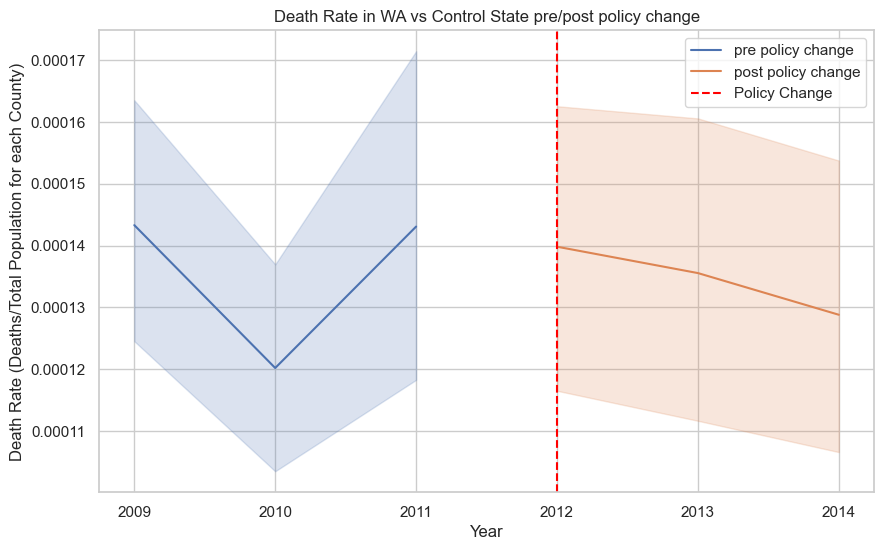

In [60]:
wa = WA_OR_cleaned[WA_OR_cleaned["State"] == "WA"]
pre_wa_graph = wa[wa["Year"].isin(pre_years)]
post_wa_graph = wa[wa["Year"].isin(post_years)]

# plot pre_fl and post_fl in one graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=pre_wa_graph, x="Year", y="DeathRate", label="pre policy change")
sns.lineplot(data=post_wa_graph, x="Year", y="DeathRate", label="post policy change")


plt.axvline(x=2012, color="red", linestyle="--", label="Policy Change")

plt.xlabel("Year")
plt.ylabel("Death Rate (Deaths/Total Population for each County)")
plt.title("Death Rate in WA vs Control State pre/post policy change")
plt.legend()

plt.show()

In [53]:
FL_WV_cleaned["DeathRate"] = FL_WV_cleaned["Deaths"] / FL_WV_cleaned["Population"]

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

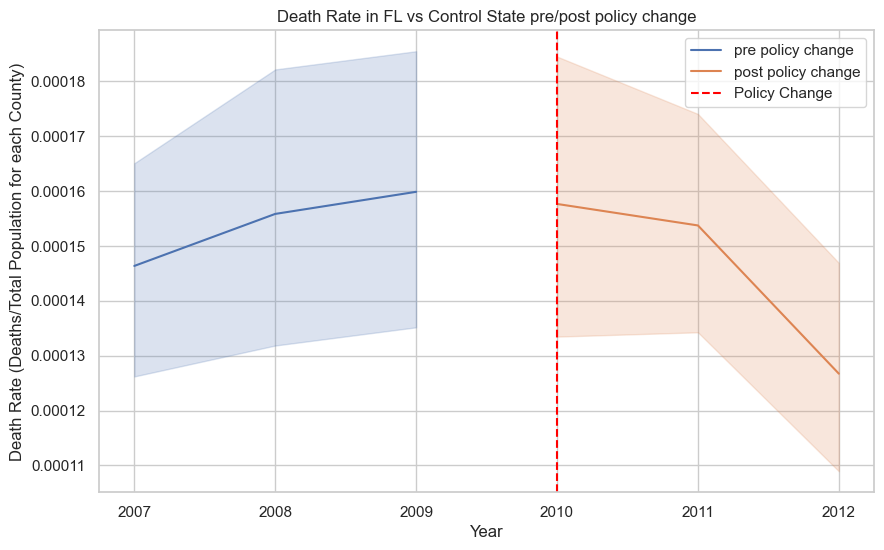

In [54]:
fl = FL_WV_cleaned[FL_WV_cleaned["State"] == "FL"]
pre_fl_graph = fl[fl["Year"].isin(pre_fl)]
post_fl_graph = fl[fl["Year"].isin(post_fl)]

# plot pre_fl and post_fl in one graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=pre_fl_graph, x="Year", y="DeathRate", label="pre policy change")
sns.lineplot(data=post_fl_graph, x="Year", y="DeathRate", label="post policy change")

wv = FL_WV_cleaned[FL_WV_cleaned["State"] == "WV"]
pre_wv_graph = wv[wv["Year"].isin(pre_fl)]
post_wv_graph = wv[wv["Year"].isin(post_fl)]

# sns.lineplot(data=pre_wv_graph, x="Year", y="DeathRate", label="control pre")
# sns.lineplot(data=post_wv_graph, x="Year", y="DeathRate", label="control post")
plt.axvline(x=2010, color="red", linestyle="--", label="Policy Change")

plt.xlabel("Year")
plt.ylabel("Death Rate (Deaths/Total Population for each County)")
plt.title("Death Rate in FL vs Control State pre/post policy change")
plt.legend()

plt.show()

In [55]:
TX_KS_cleaned["DeathRate"] = TX_KS_cleaned["Deaths"] / TX_KS_cleaned["Population"]

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

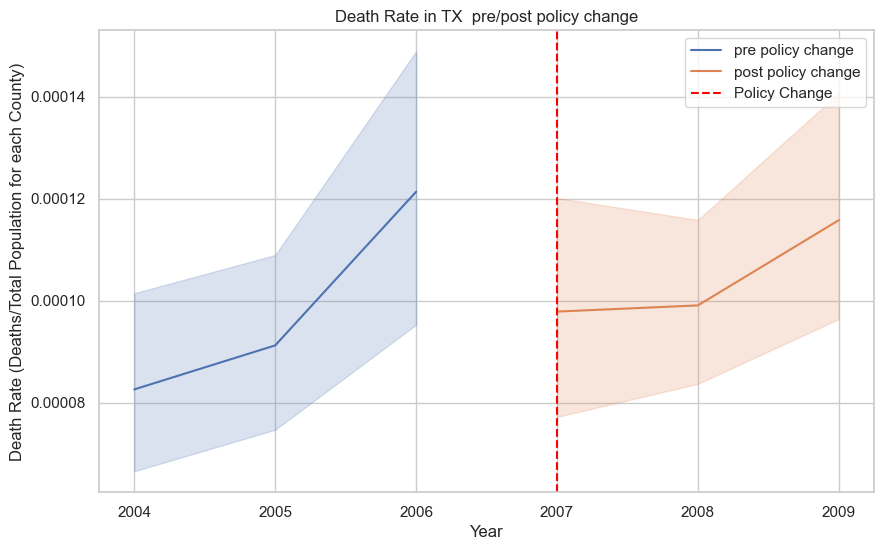

In [56]:
tx = TX_KS_cleaned[TX_KS_cleaned["State"] == "TX"]
pre_tx_graph = tx[tx["Year"].isin(pre)]
post_tx_graph = tx[tx["Year"].isin(post)]

# plot pre_fl and post_fl in one graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=pre_tx_graph, x="Year", y="DeathRate", label="pre policy change")
sns.lineplot(data=post_tx_graph, x="Year", y="DeathRate", label="post policy change")

ks = TX_KS_cleaned[TX_KS_cleaned["State"] == "KS"]
pre_ks_graph = ks[ks["Year"].isin(pre)]
post_ks_graph = ks[ks["Year"].isin(post)]

# sns.lineplot(data=pre_ks_graph, x="Year", y="DeathRate", label="control pre")
# sns.lineplot(data=post_ks_graph, x="Year", y="DeathRate", label="control post")
plt.axvline(x=2007, color="red", linestyle="--", label="Policy Change")

plt.xlabel("Year")
plt.ylabel("Death Rate (Deaths/Total Population for each County)")
plt.title("Death Rate in TX  pre/post policy change")
plt.legend()

plt.show()

# DIFF/DIFF

In [57]:
import pandas as pd
import statsmodels.api as sm

wa_plus_ref = WA_OR_cleaned[WA_OR_cleaned["State"].isin(["OR", "WA"])]
wa_plus_ref = wa_plus_ref[
    wa_plus_ref["Year"].isin([2009, 2010, 2011, 2012, 2013, 2014])
]
# Create indicators for the post-policy change period and treatment state
wa_plus_ref["PostPolicy"] = (wa_plus_ref["Year"] >= 2012).astype(int)
wa_plus_ref["Treated"] = (wa_plus_ref["State"] == "WA").astype(int)

# Create interaction terms
wa_plus_ref["PostPolicy_Treated"] = wa_plus_ref["PostPolicy"] * wa_plus_ref["Treated"]
wa_plus_ref["Year_PostPolicy"] = wa_plus_ref["Year"] * wa_plus_ref["PostPolicy"]
wa_plus_ref["Year_PostPolicy_Treated"] = (
    wa_plus_ref["Year"] * wa_plus_ref["PostPolicy"] * wa_plus_ref["Treated"]
)

# Define the model
model = sm.OLS(
    wa_plus_ref["DeathRate"],
    sm.add_constant(
        wa_plus_ref[
            [
                "PostPolicy",
                "Treated",
                "PostPolicy_Treated",
                "Year",
                "Year_PostPolicy",
                "Year_PostPolicy_Treated",
            ]
        ]
    ),
)

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())

KeyError: 'DeathRate'

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

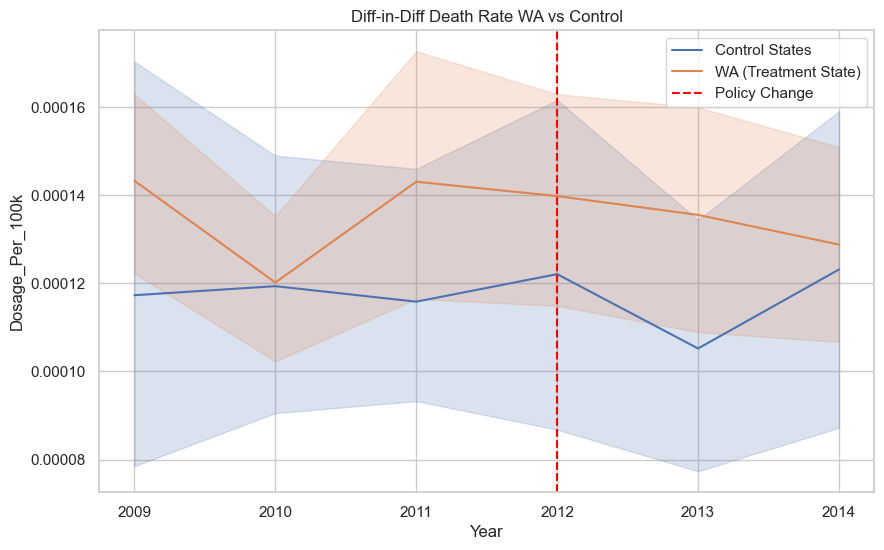

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the results
sns.set(style="whitegrid")
# Separate the data for control (non-'WA') and treatment ('WA')
df_control = wa_plus_ref[wa_plus_ref["Treated"] == 0]
df_treatment = wa_plus_ref[wa_plus_ref["Treated"] == 1]
# Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="DeathRate", data=df_control, label="Control States")
sns.lineplot(x="Year", y="DeathRate", data=df_treatment, label="WA (Treatment State)")
plt.title("Diff-in-Diff Death Rate WA vs Control")
plt.axvline(x=2012, color="red", linestyle="--", label="Policy Change")
plt.xlabel("Year")
plt.ylabel("Death Rate (Counts/Total Population in a county/year)")
plt.legend()

# FLORIDA

In [ ]:
fl_diff_diff = FL_WV_cleaned[FL_WV_cleaned["State"].isin(["FL", "WV"])]
fl_diff_diff = fl_diff_diff[
    fl_diff_diff["Year"].isin([2010, 2011, 2012, 2009, 2008, 2007])
]
# Create indicators for the post-policy change period and treatment state
fl_diff_diff["PostPolicy"] = (fl_diff_diff["Year"] >= 2010).astype(int)
fl_diff_diff["Treated"] = (fl_diff_diff["State"] == "FL").astype(int)

# Create interaction terms
fl_diff_diff["PostPolicy_Treated"] = (
    fl_diff_diff["PostPolicy"] * fl_diff_diff["Treated"]
)
fl_diff_diff["Year_PostPolicy"] = fl_diff_diff["Year"] * fl_diff_diff["PostPolicy"]
fl_diff_diff["Year_PostPolicy_Treated"] = (
    fl_diff_diff["Year"] * fl_diff_diff["PostPolicy"] * fl_diff_diff["Treated"]
)

# Define the model
model = sm.OLS(
    fl_diff_diff["DeathRate"],
    sm.add_constant(
        fl_diff_diff[
            [
                "PostPolicy",
                "Treated",
                "PostPolicy_Treated",
                "Year",
                "Year_PostPolicy",
                "Year_PostPolicy_Treated",
            ]
        ]
    ),
)

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     39.77
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.76e-34
Time:                        12:42:03   Log-Likelihood:                 2018.3
No. Observations:                 261   AIC:                            -4023.
Df Residuals:                     254   BIC:                            -3998.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

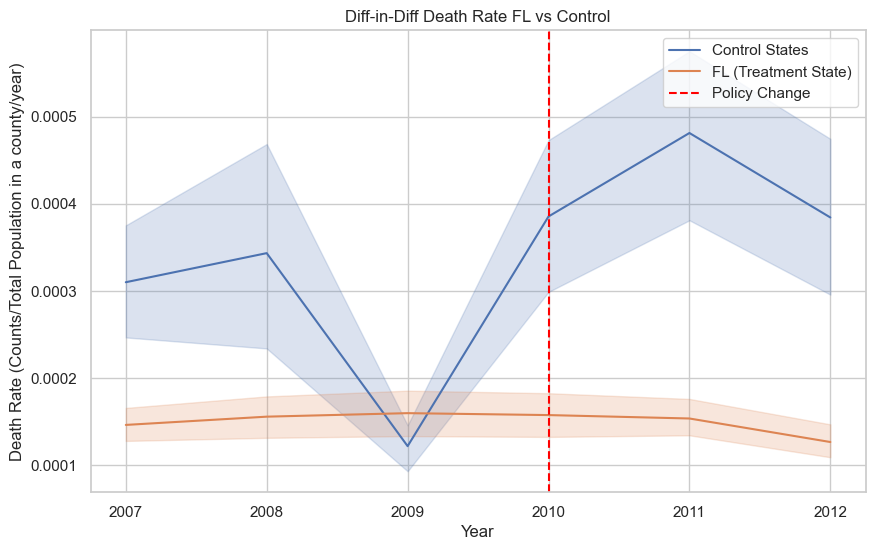

In [ ]:
sns.set(style="whitegrid")

df_control1 = fl_diff_diff[fl_diff_diff["Treated"] == 0]
df_treatment1 = fl_diff_diff[fl_diff_diff["Treated"] == 1]
# Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="DeathRate", data=df_control1, label="Control States")
sns.lineplot(x="Year", y="DeathRate", data=df_treatment1, label="FL (Treatment State)")
plt.axvline(x=2010, color="red", linestyle="--", label="Policy Change")
plt.title("Diff-in-Diff Death Rate FL vs Control")

plt.xlabel("Year")
plt.ylabel("Death Rate (Counts/Total Population in a county/year)")
plt.legend()

# TEXAS

In [ ]:
tx_diff_diff = TX_KS_cleaned[TX_KS_cleaned["State"].isin(["TX", "KS"])]
tx_diff_diff = tx_diff_diff[
    tx_diff_diff["Year"].isin([2006, 2005, 2004, 2007, 2008, 2009])
]
# Create indicators for the post-policy change period and treatment state
tx_diff_diff["PostPolicy"] = (tx_diff_diff["Year"] >= 2007).astype(int)
tx_diff_diff["Treated"] = (tx_diff_diff["State"] == "TX").astype(int)

# Create interaction terms
tx_diff_diff["PostPolicy_Treated"] = (
    tx_diff_diff["PostPolicy"] * tx_diff_diff["Treated"]
)
tx_diff_diff["Year_PostPolicy"] = tx_diff_diff["Year"] * tx_diff_diff["PostPolicy"]
tx_diff_diff["Year_PostPolicy_Treated"] = (
    tx_diff_diff["Year"] * tx_diff_diff["PostPolicy"] * tx_diff_diff["Treated"]
)

# Define the model
model = sm.OLS(
    tx_diff_diff["DeathRate"],
    sm.add_constant(
        tx_diff_diff[
            [
                "PostPolicy",
                "Treated",
                "PostPolicy_Treated",
                "Year",
                "Year_PostPolicy",
                "Year_PostPolicy_Treated",
            ]
        ]
    ),
)

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.523
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.172
Time:                        12:44:16   Log-Likelihood:                 1736.7
No. Observations:                 208   AIC:                            -3459.
Df Residuals:                     201   BIC:                            -3436.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\M

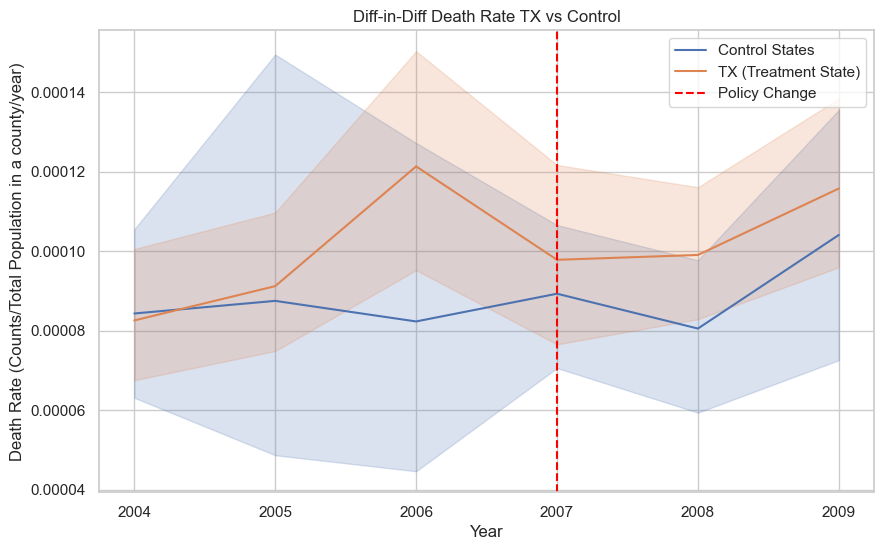

In [ ]:
sns.set(style="whitegrid")

df_control12 = tx_diff_diff[tx_diff_diff["Treated"] == 0]
df_treatment12 = tx_diff_diff[tx_diff_diff["Treated"] == 1]
# Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="DeathRate", data=df_control12, label="Control States")
sns.lineplot(x="Year", y="DeathRate", data=df_treatment12, label="TX (Treatment State)")
plt.axvline(x=2007, color="red", linestyle="--", label="Policy Change")
plt.title("Diff-in-Diff Death Rate TX vs Control")

plt.xlabel("Year")
plt.ylabel("Death Rate (Counts/Total Population in a county/year)")
plt.legend()